<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Mortgage-Backed-Securities-Prepayment-Risk</h1>
</center>

The Mortgage-Backed Securities Prepayment Risk data science project analyzes and models the risk of borrowers paying off mortgage loans early. It aims to predict prepayment behavior using historical mortgage data and machine learning techniques, helping investors manage risk and optimize returns.
<center>
  <img src="https://github-production-user-asset-6210df.s3.amazonaws.com/89405673/252298287-4c29917d-8f3c-42f6-9bb9-940cc2d2ba79.png"/>
</center>






**1) Hypothesis Generation**\
In this section, we will outline hypotheses regarding potential factors contributing to loan prepayment.


* **H1** : Borrowers with lower credit scores are more likely to refinance their mortgages when interest rates drop, leading to higher pre-payment risk for banks.

* **H2** : Borrowers with higher loan-to-value (LTV) ratios are more inclined to refinance their mortgages to take advantage of increased home equity or secure better interest rates, potentially leading to increased pre-payment risk.

* **H3** : Investors who own properties with lower occupancy rates (e.g., investment properties) are more likely to refinance or sell properties when they anticipate potential gains, contributing to higher pre-payment risk.

* **H4** : Adjustable-rate mortgages (ARMs) have higher pre-payment risk compared to fixed-rate mortgages (FRMs) due to the flexibility of ARMs to adjust interest rates over time. This flexibility may incentivize borrowers to refinance when rates decrease, leading to increased pre-payment risk.

* **H5** : Borrowers with higher debt-to-income (DTI) ratios are more sensitive to changes in their financial situation. They are more likely to refinance when they experience improvements, potentially increasing pre-payment risk for banks.

* **H6** : Mortgages originated during periods of historically low interest rates have higher pre-payment risk. Borrowers who obtained mortgages at these low rates may be more inclined to refinance when rates rise, contributing to higher pre-payment risk.


**2) Loading Data (CSV file)**



In [1]:
%%capture
!pip install category_encoders

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# paths to test and train datasets
data_path = "/content/drive/MyDrive/LoanExport.csv"

# loading our data using pandas
main_data = pd.read_csv(data_path)
data = main_data

# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

<ipython-input-59-f65876b45c96>:22: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data = pd.read_csv(data_path)


<center>
  <img src="https://github-production-user-asset-6210df.s3.amazonaws.com/89405673/255545353-e81327d2-5d87-43e9-91dd-e5d6653cd5b6.gif"/>
</center>

In [3]:
print(f"shape of train data : {data.shape}")

shape of train data : (291451, 28)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [5]:
# desplay first 5 rows
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
# desplay last 5 rows
data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


**3) checking the types of data**

In [6]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

**4) Dropping irrelevant columns**


In [7]:
cols_to_delete = ['MSA', 'SellerName', 'Units', 'PostalCode', 'LoanSeqNum']
for col in cols_to_delete:
  if col in data.columns:
    data = data.drop(col, axis=1)


# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

**5) Dropping duplicated rows**

In [8]:
duplicated_rows = data[data.duplicated]
print(f"number of duplicated rows : {duplicated_rows.shape[0]}") # fortunatly, our data is not duplicated
data = data.drop_duplicates()

number of duplicated rows : 42


**6) handling missing values**

In [9]:
# after a manual investigation on data, we have noticed some missing values
# but not nan (X : in MSA column for example)

for col in cat_cols:
  data[col] = data[col].str.lower().str.strip().replace(["x"], None)

In [10]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    78004
MaturityDate              0
MIP                       0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                    5404
ProductType               0
PropertyState             0
PropertyType             22
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            338
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [11]:
# let's calculate the ration of missing values
# (if the ration is significantly high then we will drop the entire column)
col_with_nan = data.columns[data.isna().any()]
for col in col_with_nan:
  train_null_ratio = data[col].isnull().sum()*100 / data.shape[0]
  print(f"null( {col:30}) / total ==> [should be delete ---> ({train_null_ratio > 30})] {train_null_ratio:.2f}%")

  if train_null_ratio > 30:
    data = data.drop(col, axis=1)
    col_with_nan = col_with_nan.drop(col)



# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

null( FirstTimeHomebuyer            ) / total ==> [should be delete ---> (False)] 26.77%
null( PPM                           ) / total ==> [should be delete ---> (False)] 1.85%
null( PropertyType                  ) / total ==> [should be delete ---> (False)] 0.01%
null( NumBorrowers                  ) / total ==> [should be delete ---> (False)] 0.12%


In [12]:
# cat_cols.drop("PostalCode"), col_with_nan.drop("PostalCode")
for col in col_with_nan:
  data[col] = data[col].fillna(data[col].mode()[0])

data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MIP                   0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

**8) Categorical Variables encoding**

In [13]:
# let's check number of values in each cat column
hist_freq = data[cat_cols].nunique()
hist_freq

# LoanSeqNum : sames to have the highest number of categories

FirstTimeHomebuyer     2
Occupancy              3
Channel                4
PPM                    2
ProductType            1
PropertyState         53
PropertyType           6
LoanPurpose            3
NumBorrowers           2
ServicerName          20
dtype: int64

In [14]:
# ProductType takes one value all the time (constant)
# then we should drop it
if "ProductType" in cat_cols:
    data = data.drop("ProductType", axis=1)
    cat_cols = cat_cols.drop("ProductType")


In [15]:
hist_freq = data[cat_cols].nunique()

for col, freq in hist_freq.iteritems():
  if freq == 2:
    val1,val2 = data[col].unique()
    print(val1, val2)
    data[col] = data[col].replace({val1: 0, val2: 1})
    data[col] = data[col].astype(np.int64)


# categorical variables
cat_cols = data.select_dtypes("object").columns

# numerical variables
num_cols = data.select_dtypes(exclude="object").columns

<ipython-input-15-43986c8598b9>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, freq in hist_freq.iteritems():


n y
n y
2 1


In [18]:
cat2one_hot = [col for col in cat_cols if data[col].nunique() < 5]
cat2target_encoding = cat_cols.drop(cat2one_hot)
cat2target_encoding

Index(['PropertyState', 'PropertyType', 'ServicerName'], dtype='object')

###### for onehot encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

#one hot encoder object
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_data = pd.DataFrame(OH_encoder.fit_transform(data[cat2one_hot]))

# One-hot encoding removed index; put it back
OH_cols_data.index = data.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_data = data.drop(cat_cols, axis=1)

# this is the categorical data that will be encoded later
# using the 'target encoder'
cat_2_TE_data = data[cat2target_encoding]

# Add one-hot encoded columns to numerical features
OH_X_data = pd.concat([num_X_data, cat_2_TE_data, OH_cols_data], axis=1)

# Ensure all columns have string type
OH_X_data.columns = OH_X_data.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
OH_X_data

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,0,1,2,3,4,5,6,7,8,9
0,0,199902,0,202901,25,89,27,117000,89,6.750,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,199902,0,202901,0,73,17,109000,73,6.500,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,199902,0,202901,0,75,16,88000,75,6.875,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,199902,0,202901,0,76,14,160000,76,6.875,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,199902,0,202901,0,78,18,109000,78,7.125,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,0,202902,0,60,32,90000,60,7.000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
291447,840,200210,0,202904,0,73,0,267000,73,6.375,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
291448,840,200304,0,202904,0,73,31,87000,73,5.625,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
291449,845,199904,0,202903,0,80,54,88000,80,7.000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


###### for target encoding

In [21]:
# Encoding split
target_variable = "EverDelinquent"

X_encode = OH_X_data.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop(target_variable)

# Training split
X_pretrain = OH_X_data.drop(X_encode.index)
y_train = X_pretrain.pop(target_variable)

In [22]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(
    cols=cat2target_encoding,
    m=1.0,
)

# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)



In [23]:
clean_data = X_train
clean_data[target_variable] = y_train

print(clean_data.columns)

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PPM',
       'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent', 'MonthsInRepayment',
       'PropertyState', 'PropertyType', 'ServicerName', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', 'EverDelinquent'],
      dtype='object')


Text(0.5, 9.444444444444438, 'EverDelinquent')

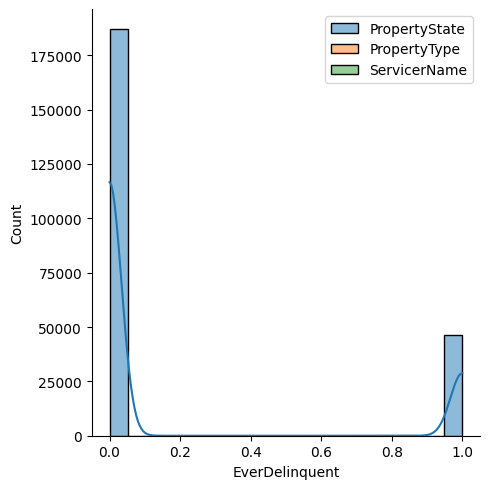

In [24]:
# comparing the distributions with the target
feature = encoder.cols

# Replace distplot with displot for kernel density plot
ax = sns.displot(y_train, kde=True)

# Replace distplot with histplot for histogram
ax = sns.histplot(X_train[feature], color='r', kde=False, stat="density")
ax.set_xlabel(target_variable)

**7) Detecting Outliers**

In [25]:
data = clean_data
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PPM',
       'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent', 'MonthsInRepayment',
       'PropertyState', 'PropertyType', 'ServicerName', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', 'EverDelinquent'],
      dtype='object')

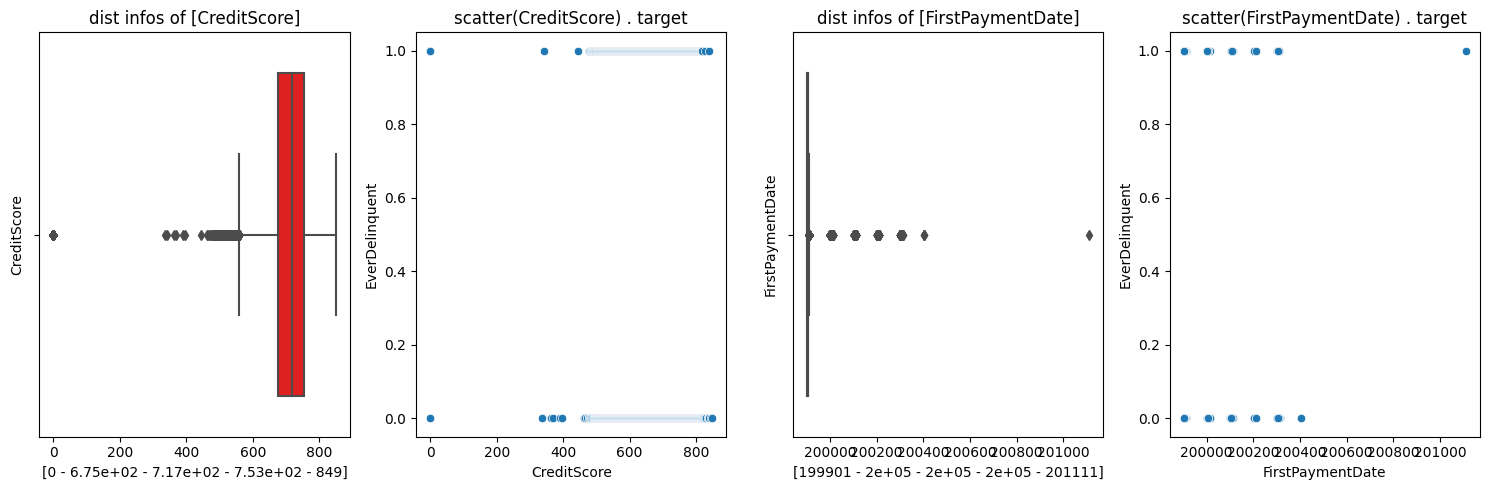

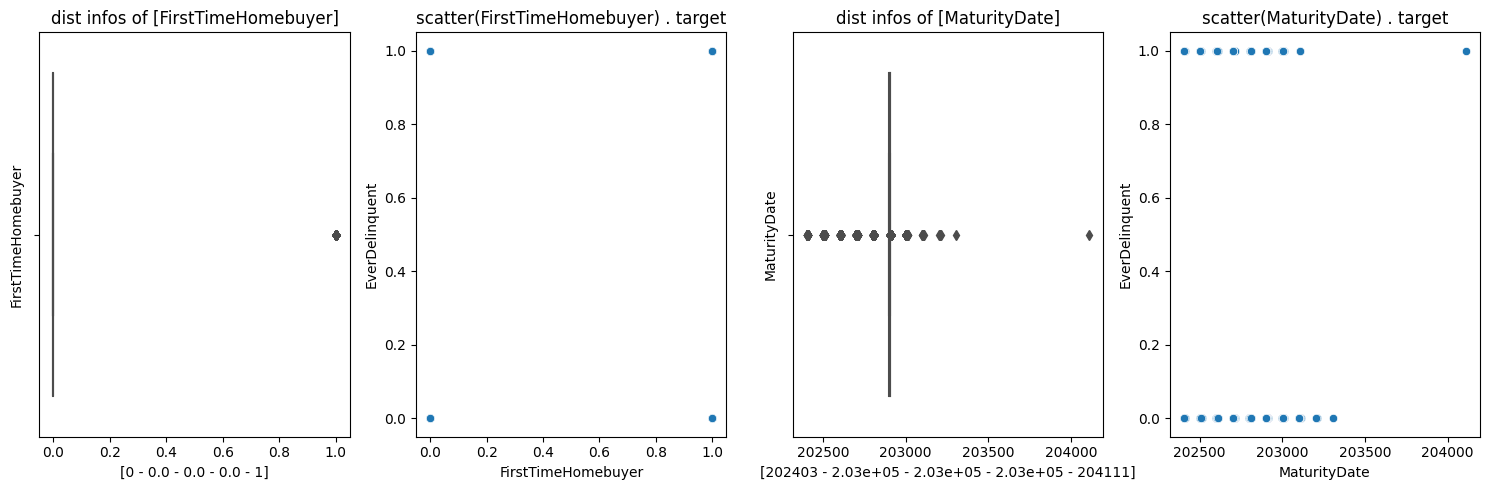

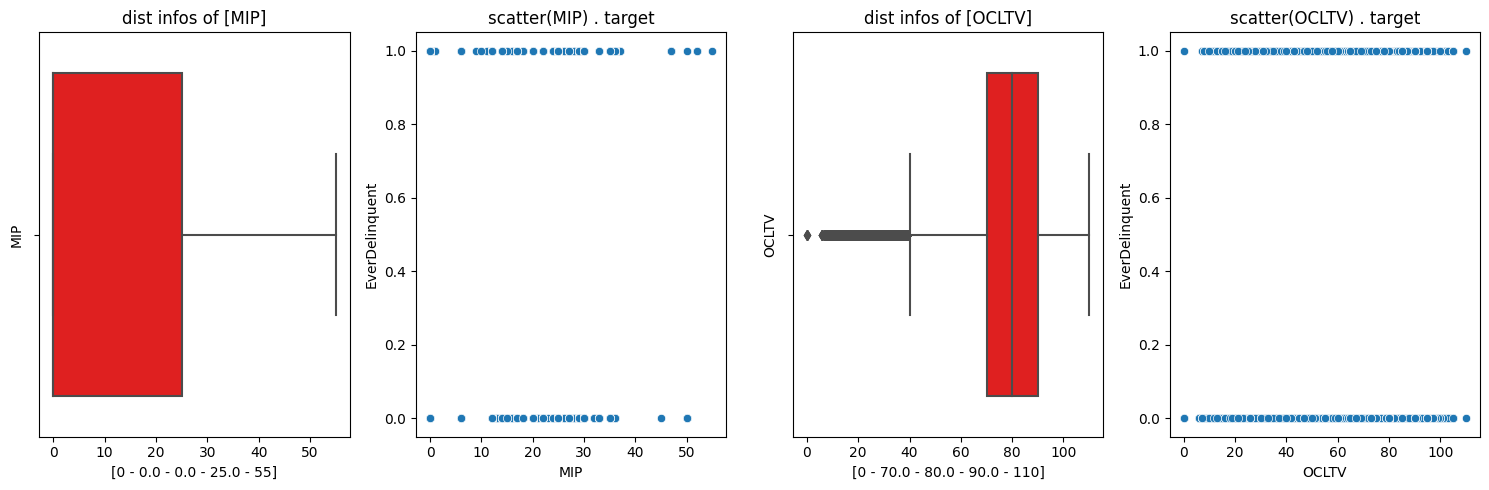

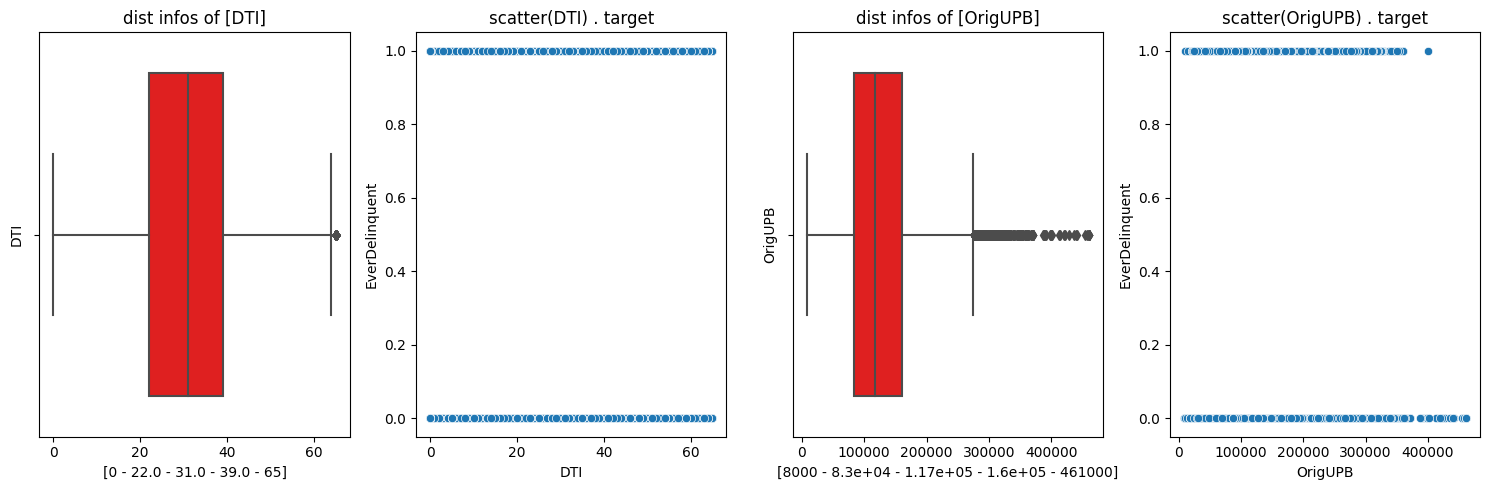

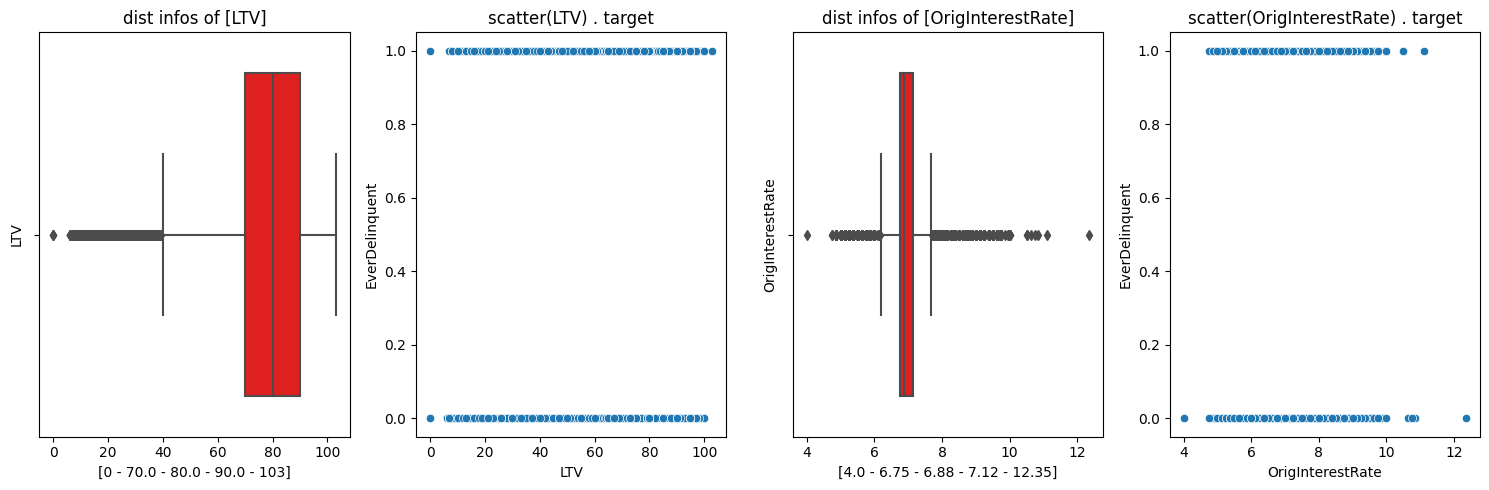

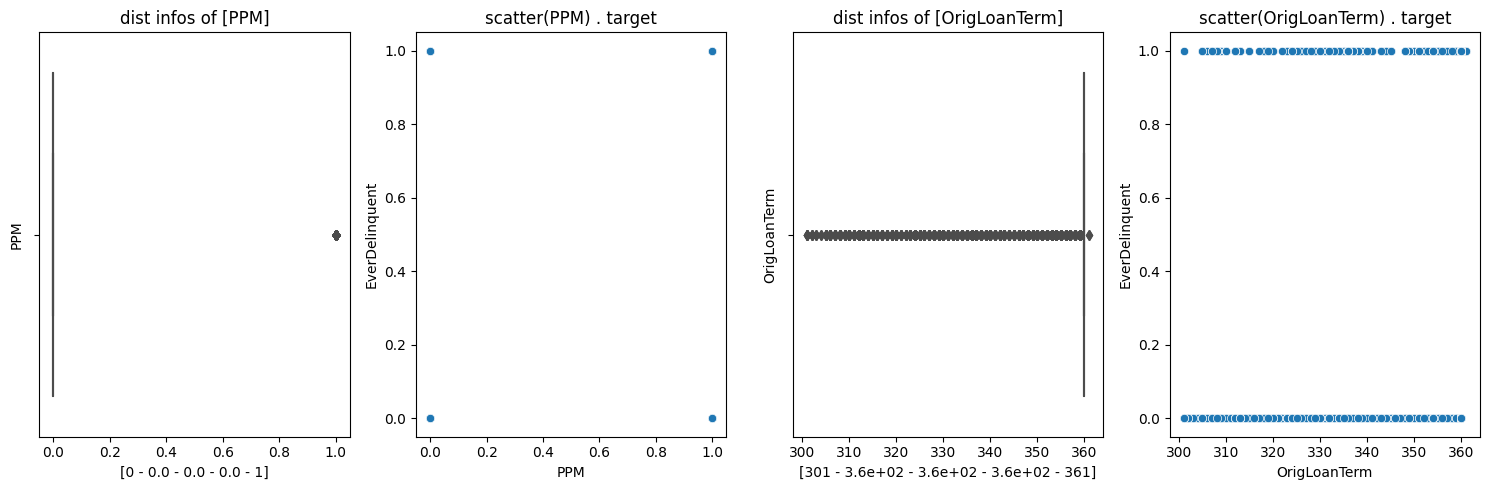

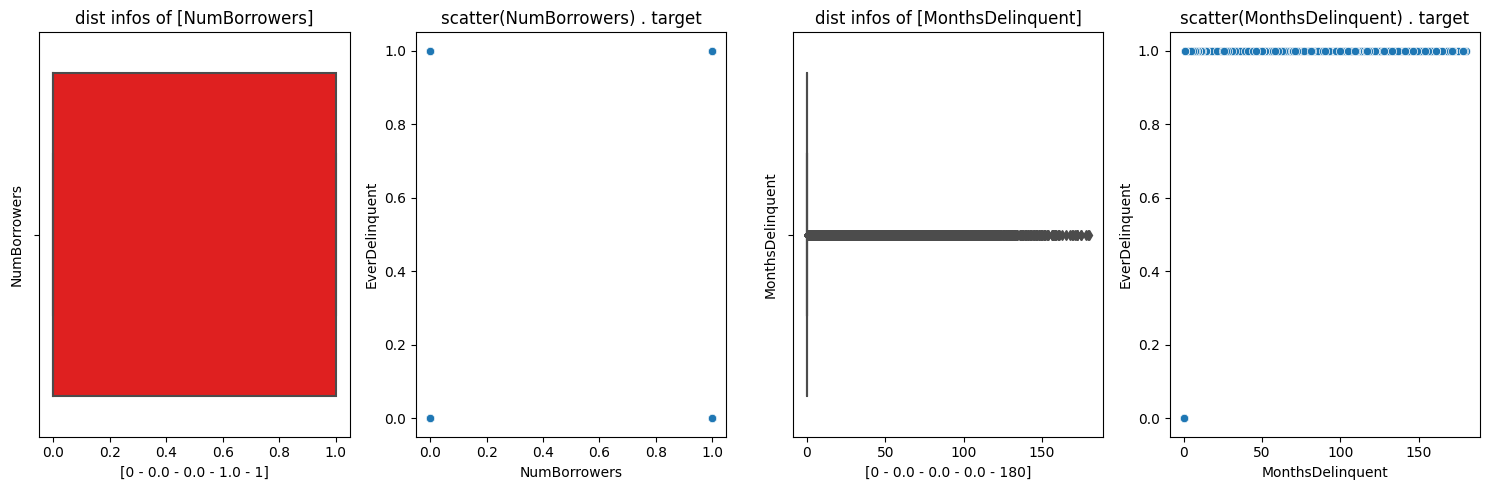

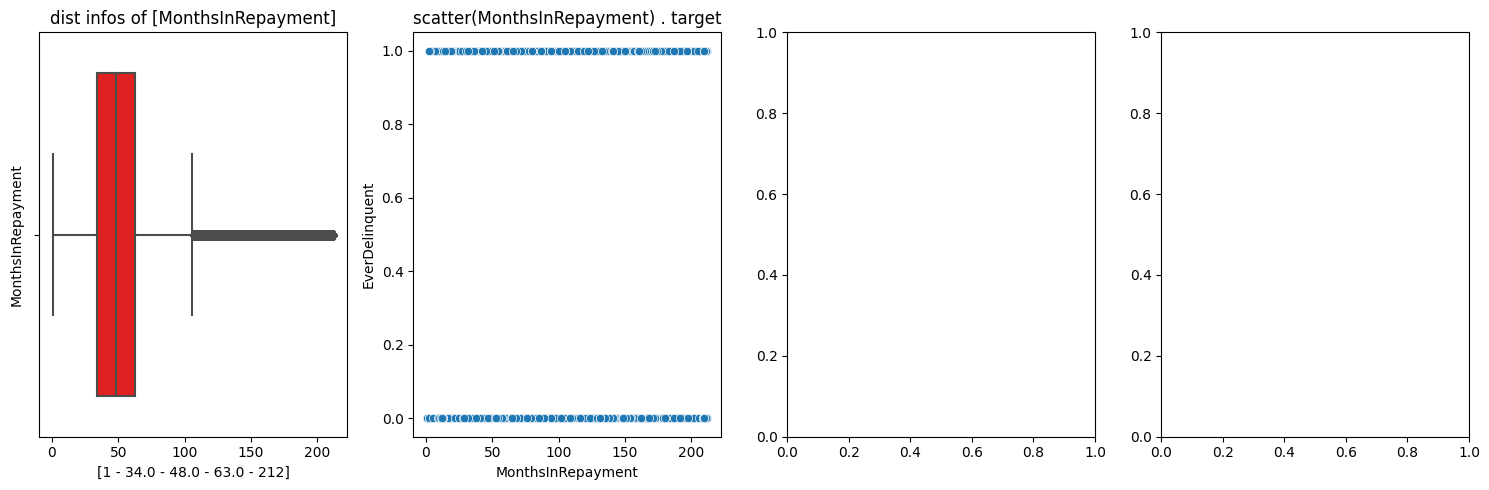

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PPM',
       'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')

In [26]:
# # dropping the target column
if target_variable in num_cols:
  num_cols = num_cols.drop(target_variable)

# # Create the scaler
scaler = StandardScaler()

# # normalazing the num cols
normalized_data = pd.DataFrame(data=scaler.fit_transform(data[num_cols]),
                               columns=data[num_cols].columns)

g_per_row = 2
for i in range(0, len(num_cols), g_per_row):
  num_graph = len(num_cols) - i if len(num_cols)-i < g_per_row else g_per_row
  fig, axes = plt.subplots(1, 2*g_per_row, figsize=(15, 5))
  for j,k in enumerate(range(0,2*num_graph-1,2)):
    col = num_cols[i+j]

    # building the boxplot (will gives us the boundaries of the meaningfull data)
    sns.boxplot(x=data[col], color='red', ax=axes[k])
    axes[k].set_title(f'dist infos of [{col}]')
    axes[k].set_ylabel(col)


    quantile = data[col].quantile([0.25,0.5,0.75])
    Q1 = quantile[0.25]
    Q3 = quantile[0.75]
    median = data[col].median()
    min = data[col].min()
    max = data[col].max()
    axes[k].set_xlabel(f"[{min} - {Q1:.3} - {median:.3} - {Q3:.3} - {max}]")


    # scatter col according to the target (another way to get an idea about outliers in our data)
    sns.scatterplot(data=data, x=col, y=data[target_variable], ax=axes[k+1])
    axes[k+1].set_title('scatter('+col+') . target')
    axes[k+1].set_xlabel(col)
    axes[k+1].set_ylabel(target_variable)

  plt.tight_layout()
  print("\n\n")
  plt.show()

num_cols

In [27]:
from numpy.core.multiarray import min_scalar_type
# heler function
def remove_outlier(input_df, col):
    q1 = input_df[col].quantile(0.25)
    q3 = input_df[col].quantile(0.75)
    IQR = q3 - q1                         #Interquartile range
    min_scalar_type  = q1-1.5*IQR
    max = q3+1.5*IQR
    output_df = input_df.loc[(input_df[col] > min) & (input_df[col] < max)]
    return output_df

# loop over all cols with outliers, and remove them
# col_with_outliers = ["MonthsInRepayment","OrigInterestRate","LTV","OrigUPB","OCLTV","DTI"]
col_with_outliers = ["LTV","OrigUPB","OCLTV","DTI"]
for col in col_with_outliers:
  data = remove_outlier(data, col)

data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,...,1,2,3,4,5,6,7,8,9,EverDelinquent
0,0,199902,0,202901,25,89,27,117000,89,6.750,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,0,199902,0,202901,0,73,17,109000,73,6.500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0,199902,0,202901,0,75,16,88000,75,6.875,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,0,199902,0,202901,0,76,14,160000,76,6.875,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0,199902,0,202901,0,78,18,109000,78,7.125,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


#Let's cluster some categorical variables for better readability.

In [28]:
data = clean_data

> CreditScore ==> CreditRange

In [29]:
def get_credit_range(value):
  min_val = [0, 650, 700, 750]
  max_val = [650, 700, 750, 900]
  for cluster, (min_bp, max_bp) in enumerate(zip(min_val, max_val)):
    if min_bp <= value < max_bp:
      return cluster + 1


if "CreditScore" in data.columns:
  data['CreditRange'] = data['CreditScore'].apply(get_credit_range)
  data.drop(columns='CreditScore', inplace=True)
  print("yeah, we have clustered CreditScore in CreditRange successfully !")

yeah, we have clustered CreditScore in CreditRange successfully !


> LTV ===> LTV_Range

In [30]:
def get_ltv_range(value):
  min_val = [0,25,50]
  max_val = [25,50,1000]
  for cluster, (min_bp, max_bp) in enumerate(zip(min_val, max_val)):
    if min_bp <= value < max_bp:
      return cluster + 1


if "LTV" in data.columns:
  data['LTV_Range'] = data['LTV'].apply(get_ltv_range)
  data.drop(columns='LTV', inplace=True)
  print("yeah, we have clustered LTV in LTV_Range successfully !")

yeah, we have clustered LTV in LTV_Range successfully !


> Repay ===> Repay_Range

In [31]:
def get_repay_range(value):
  min_val = [0,4,8,12,16]
  max_val = [4,8,12,16,20]
  for cluster, (min_bp, max_bp) in enumerate(zip(min_val, max_val)):
    if min_bp <= value // 12 < max_bp:
      return cluster + 1


if "MonthsInRepayment" in data.columns:
  data['Repay_Range'] = data['MonthsInRepayment'].apply(get_repay_range)
  data.drop(columns='MonthsInRepayment', inplace=True)
  print("yeah, we have clustered MonthsInRepayment in Repay_Range successfully !")

yeah, we have clustered MonthsInRepayment in Repay_Range successfully !


> FirstTimeHomebuyer ===> IsFirstTime

In [32]:
data.rename(columns={'FirstTimeHomebuyer': 'IsFirstTime'}, inplace=True)

data.columns

Index(['FirstPaymentDate', 'IsFirstTime', 'MaturityDate', 'MIP', 'OCLTV',
       'DTI', 'OrigUPB', 'OrigInterestRate', 'PPM', 'OrigLoanTerm',
       'NumBorrowers', 'MonthsDelinquent', 'PropertyState', 'PropertyType',
       'ServicerName', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'EverDelinquent', 'CreditRange', 'LTV_Range', 'Repay_Range'],
      dtype='object')

# Exploratory Data Analysis

####Univariate Analysis


> **Histogram** : to visualize the distribution of a single numerical variable and understand its pattern.

> **Violin Plot** : to visualize the distribution of a numerical variable and provide insights into its central tendency, spread, and density while displaying the presence of multiple modes or potential outliers.

> **Scatter Plot** : to visualize the relationship between two numerical variables (index and value in our case) and identify any patterns, trends, or correlations that may exist between them.

> **Box Plot** : to visualize the distribution of a numerical variable, display its median, quartiles, and identify potential outliers, helping to understand the data's spread and central tendency.

> **Empirical Cumulative Distribution Function (ECDF)** : to visualize the distribution of a numerical variable and show the cumulative proportion of data points that are less than or equal to a given value, providing a complete overview of the data's distribution, including its spread, central tendency, and percentiles.


====> CreditRange



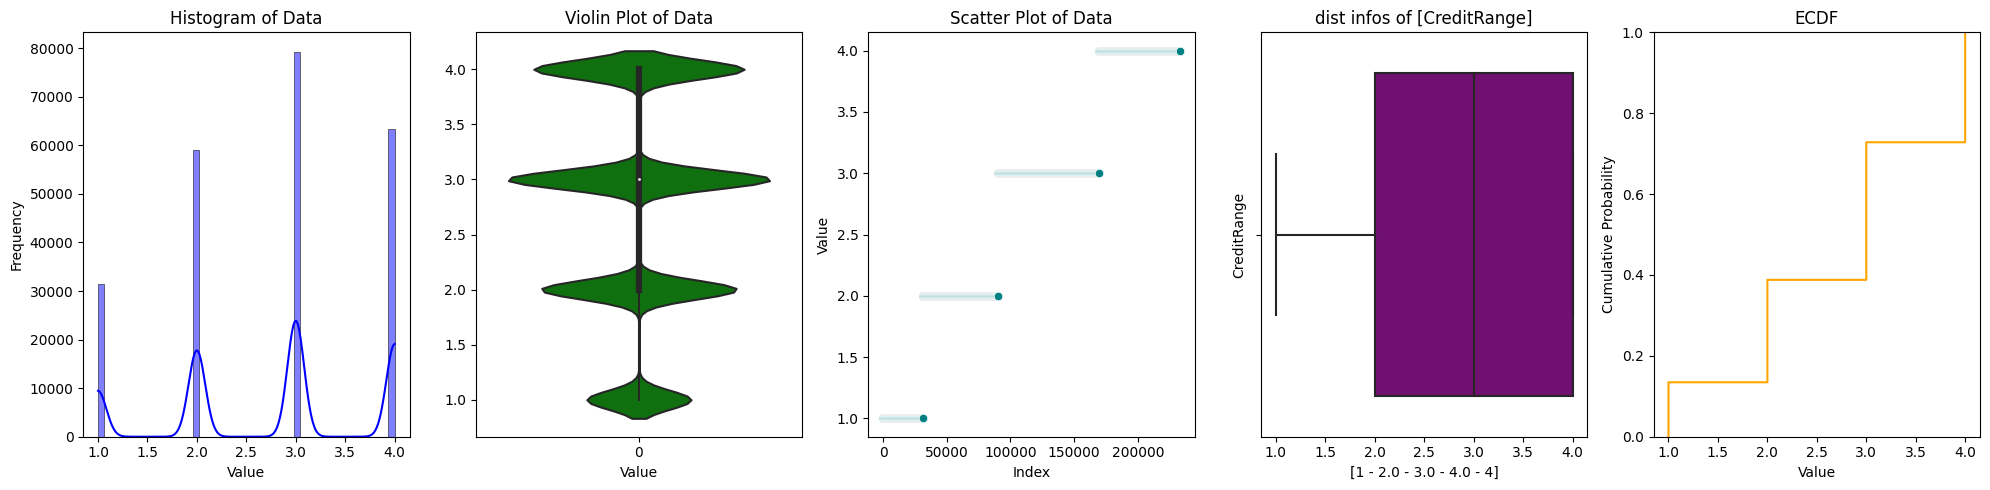


====> OrigUPB



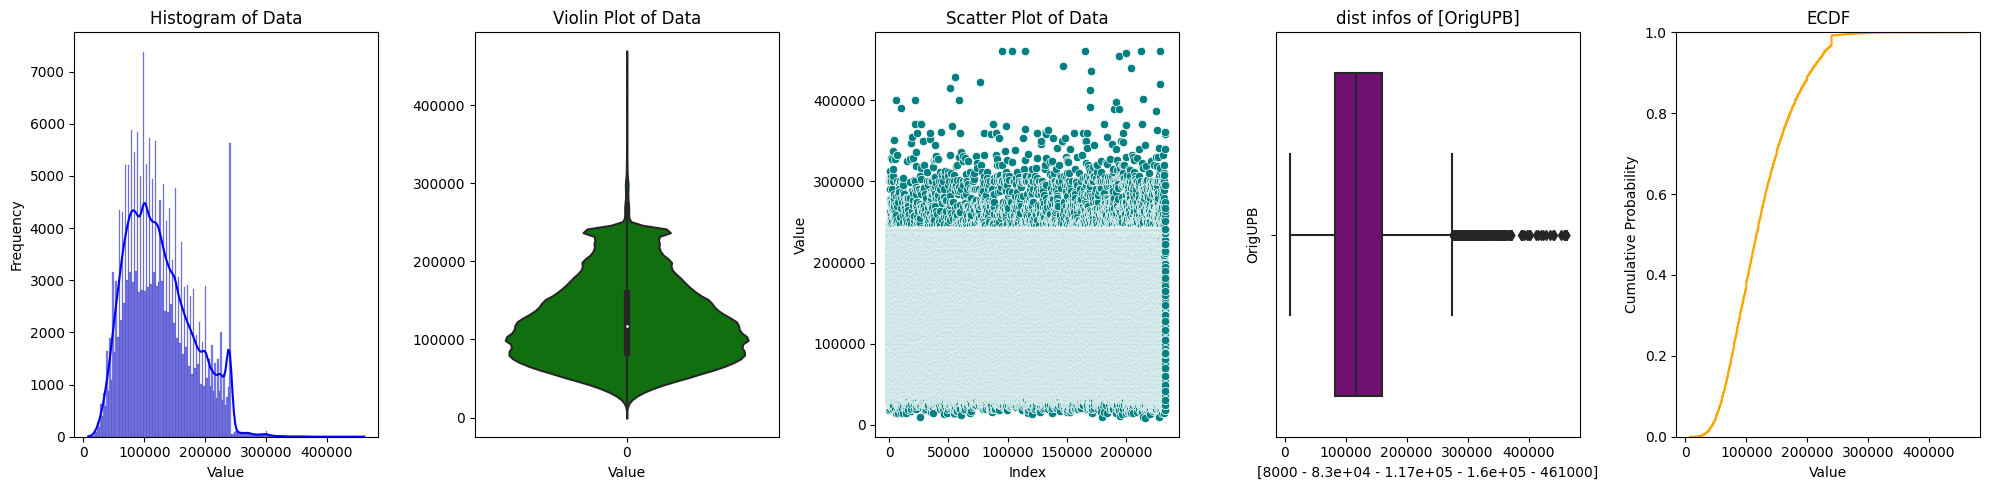


====> LTV_Range



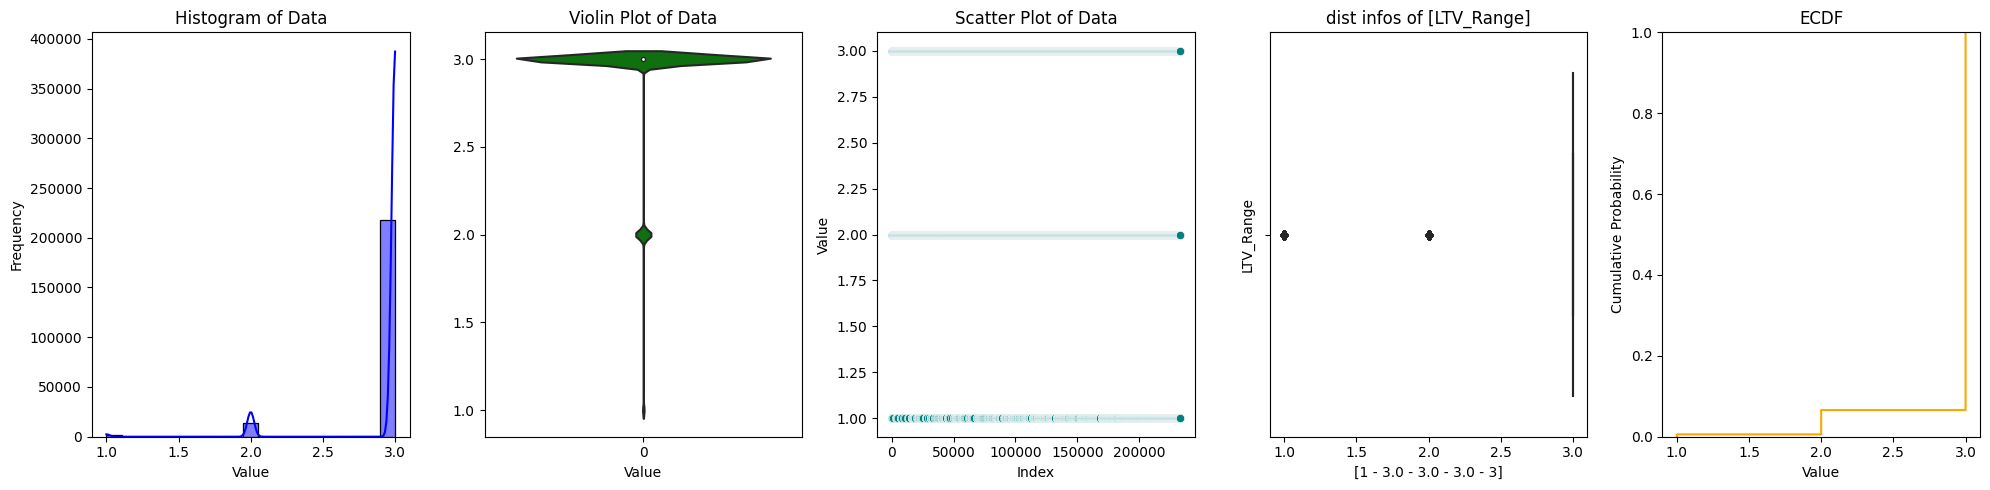


====> OCLTV



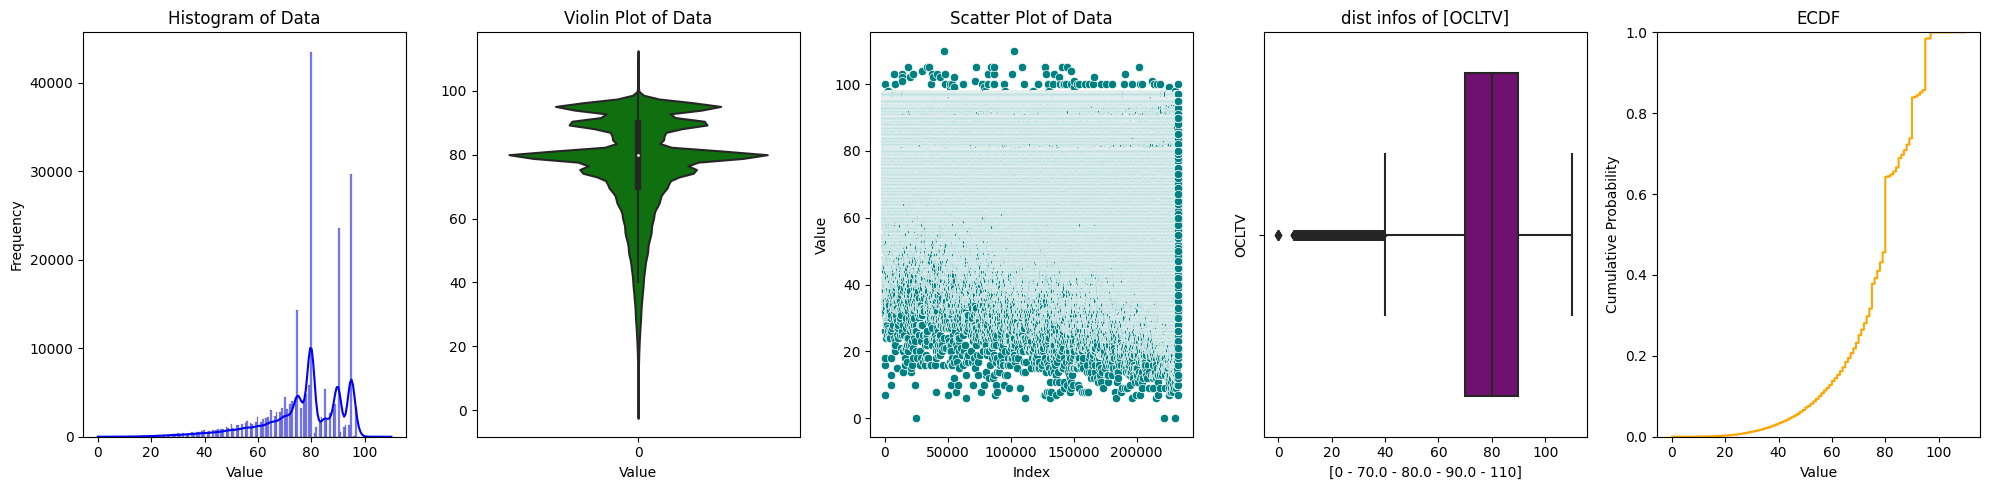


====> MIP



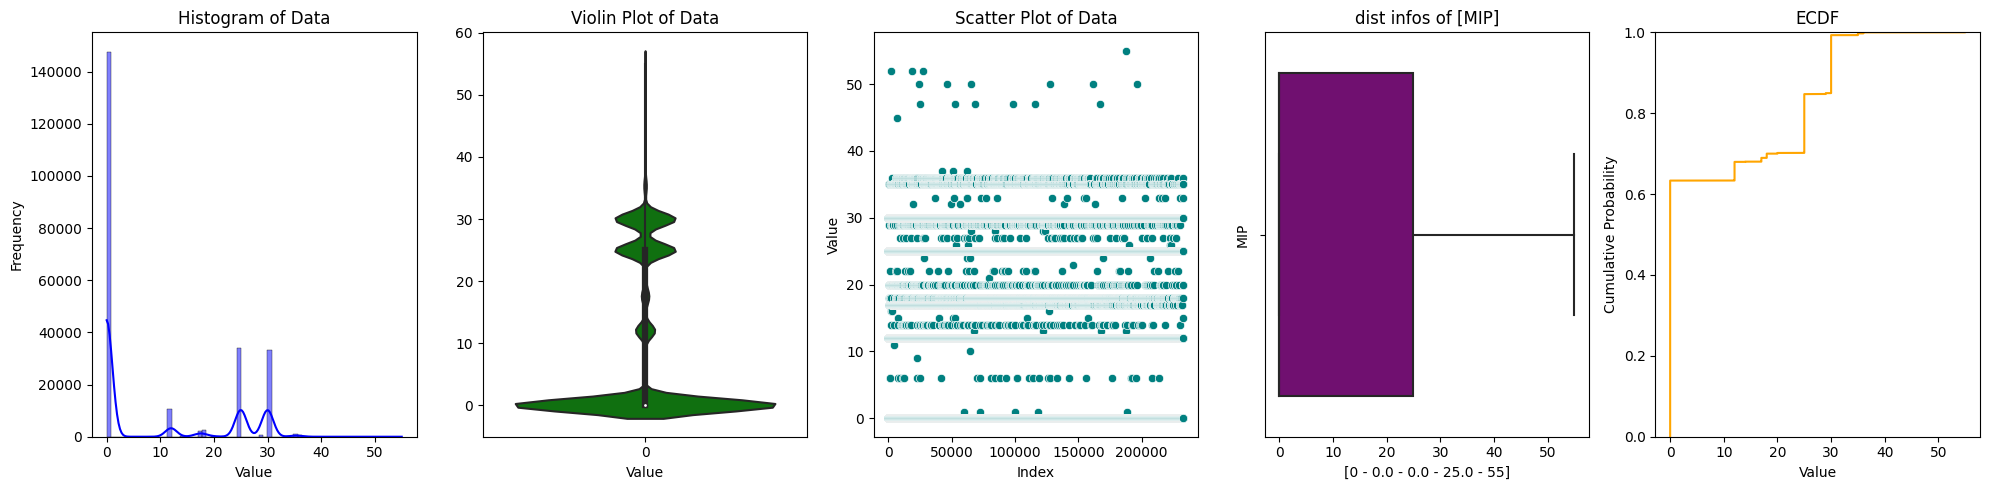


====> OrigInterestRate



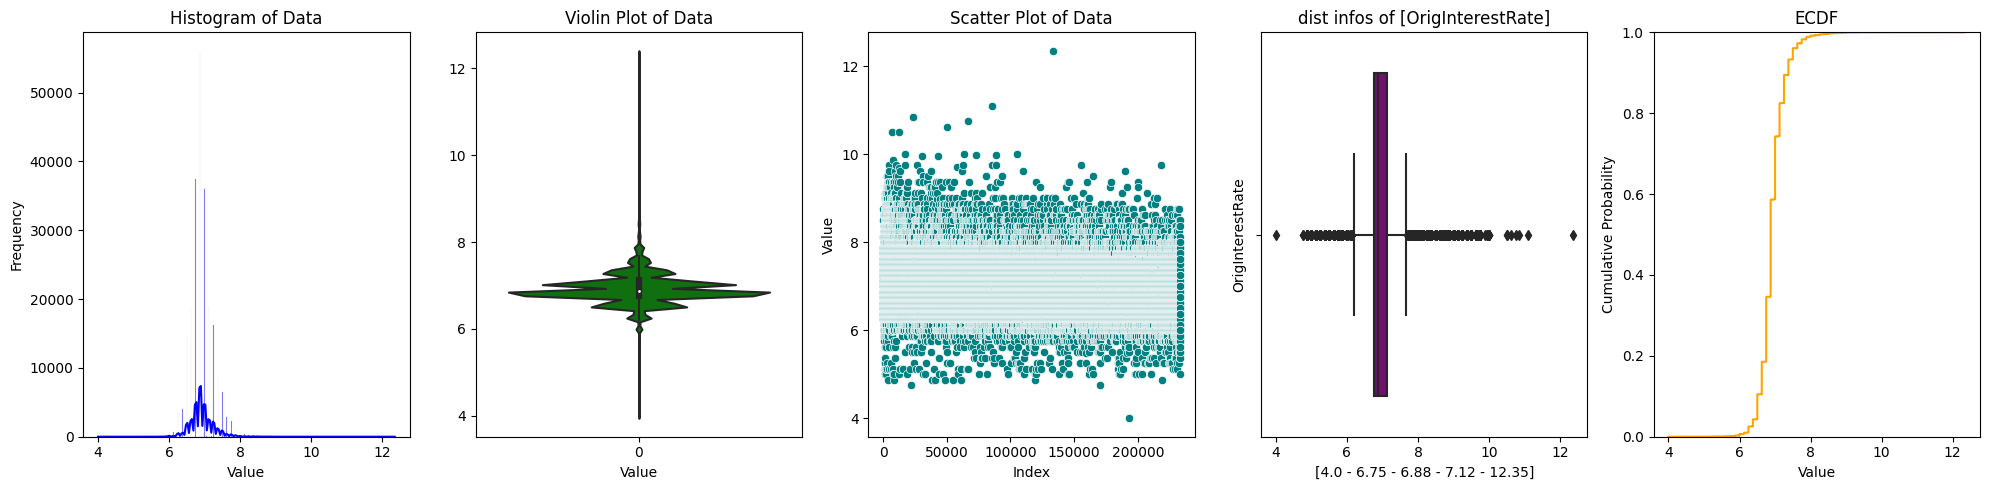


====> DTI



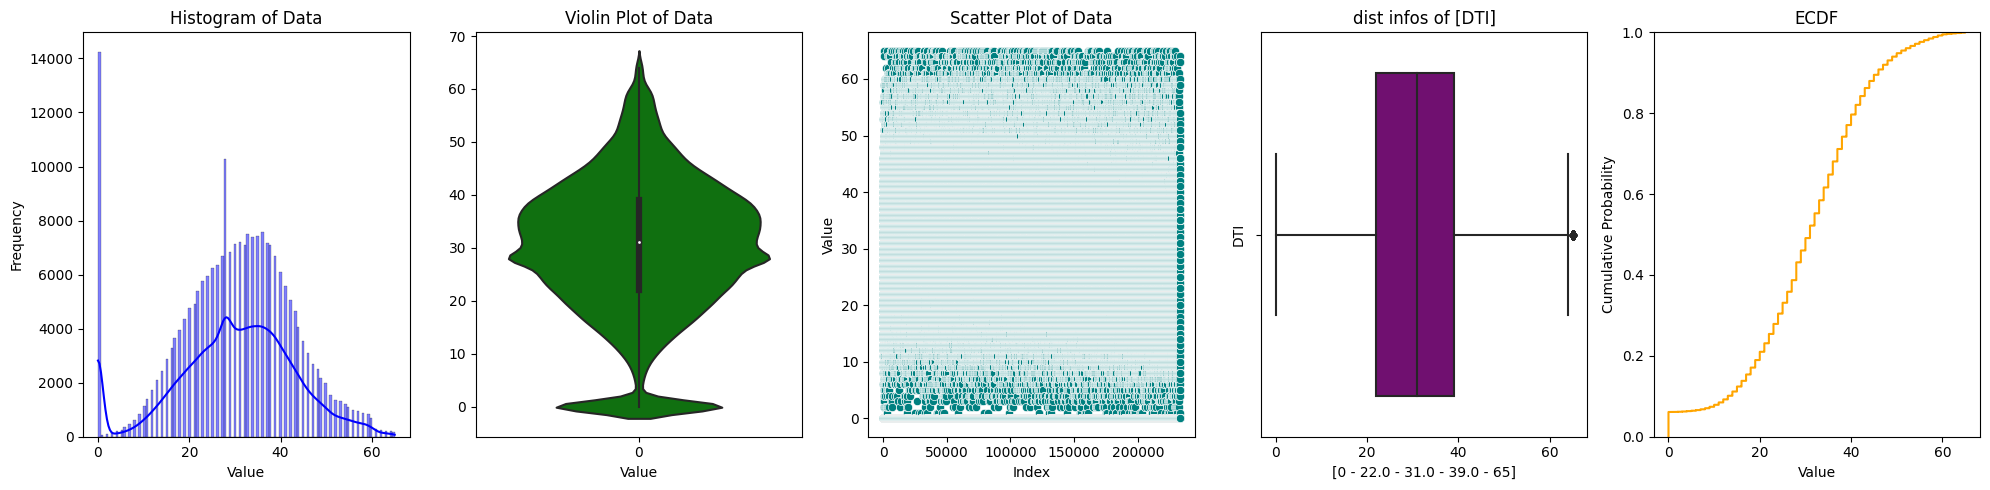

In [ ]:
# visualize Univariate analysis
def visualize_univariate_analysis(col):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Create 1 row with 5 columns for the plots

    print(f"\n====> {col}\n")

    # Histogram
    sns.histplot(data[col], kde=True, color='blue', ax=axes[0])
    axes[0].set_title('Histogram of Data')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')

    # Violin Plot
    sns.violinplot(data[col], color='green', ax=axes[1])
    axes[1].set_title('Violin Plot of Data')
    axes[1].set_xlabel('Value')

    # Scatter Plot
    sns.scatterplot(x=np.arange(len(data[col])), y=data[col], color='teal', ax=axes[2])
    axes[2].set_title('Scatter Plot of Data')
    axes[2].set_xlabel('Index')
    axes[2].set_ylabel('Value')


    # Box plot
    sns.boxplot(x=data[col], color='purple', ax=axes[3])
    axes[3].set_title(f'dist infos of [{col}]')
    axes[3].set_ylabel(col)

    quantile = data[col].quantile([0.25,0.5,0.75])
    Q1 = quantile[0.25]
    Q3 = quantile[0.75]
    median = data[col].median()
    min = data[col].min()
    max = data[col].max()
    axes[3].set_xlabel(f"[{min} - {Q1:.3} - {median:.3} - {Q3:.3} - {max}]")


    # Empirical Cumulative Distribution Function (ECDF)
    sns.ecdfplot(data[col], color='orange', ax=axes[4])
    axes[4].set_title('ECDF')
    axes[4].set_xlabel('Value')
    axes[4].set_ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

# Visualize for each numerical column
uni_num_cols = ["CreditRange", "OrigUPB", "LTV_Range", "OCLTV", "MIP", "OrigInterestRate", "DTI"]
for col in uni_num_cols:
  visualize_univariate_analysis(col)

####Conclusion

bla bla bla bla bla bla

####Bivariate Analysis

<center>
  <img src="https://github-production-user-asset-6210df.s3.amazonaws.com/89405673/255545350-87a2558d-9f56-444c-b1c2-8c7c4248db6a.png" width="500" height="250" />
</center>

> let's get Continuous and Categorical columns from our pre-cleaned dataset

In [ ]:
discrete_vars = []
continuous_vars = []
data = clean_data
# Loop through each column and determine its data type
for column in data.columns:
    if pd.api.types.is_integer_dtype(data[column]) or pd.api.types.is_bool_dtype(data[column]):
        discrete_vars.append(column)
    elif pd.api.types.is_float_dtype(data[column]):
        continuous_vars.append(column)

print("Discrete Variables:", discrete_vars)
print("Continuous Variables:", continuous_vars)

Discrete Variables: ['FirstPaymentDate', 'IsFirstTime', 'MaturityDate', 'MIP', 'OCLTV', 'DTI', 'OrigUPB', 'PPM', 'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent', 'EverDelinquent', 'CreditRange', 'LTV_Range', 'Repay_Range']
Continuous Variables: ['OrigInterestRate', 'PropertyState', 'PropertyType', 'ServicerName', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
data[discrete_vars].nunique()

FirstPaymentDate     64
IsFirstTime           2
MaturityDate         92
MIP                  34
OCLTV               102
DTI                  66
OrigUPB             366
PPM                   2
OrigLoanTerm         61
NumBorrowers          2
MonthsDelinquent    171
EverDelinquent        2
CreditRange           4
LTV_Range             3
Repay_Range           5
dtype: int64

> visualize different plots for continuous varibles according to target variable.

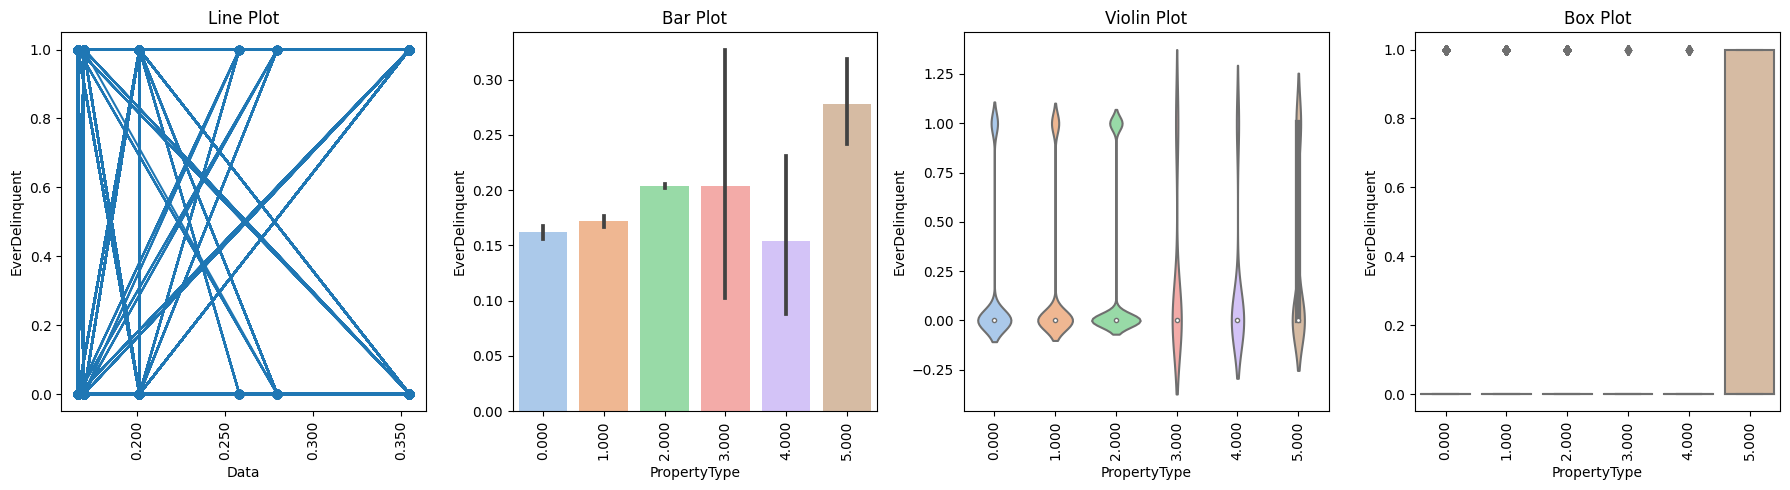

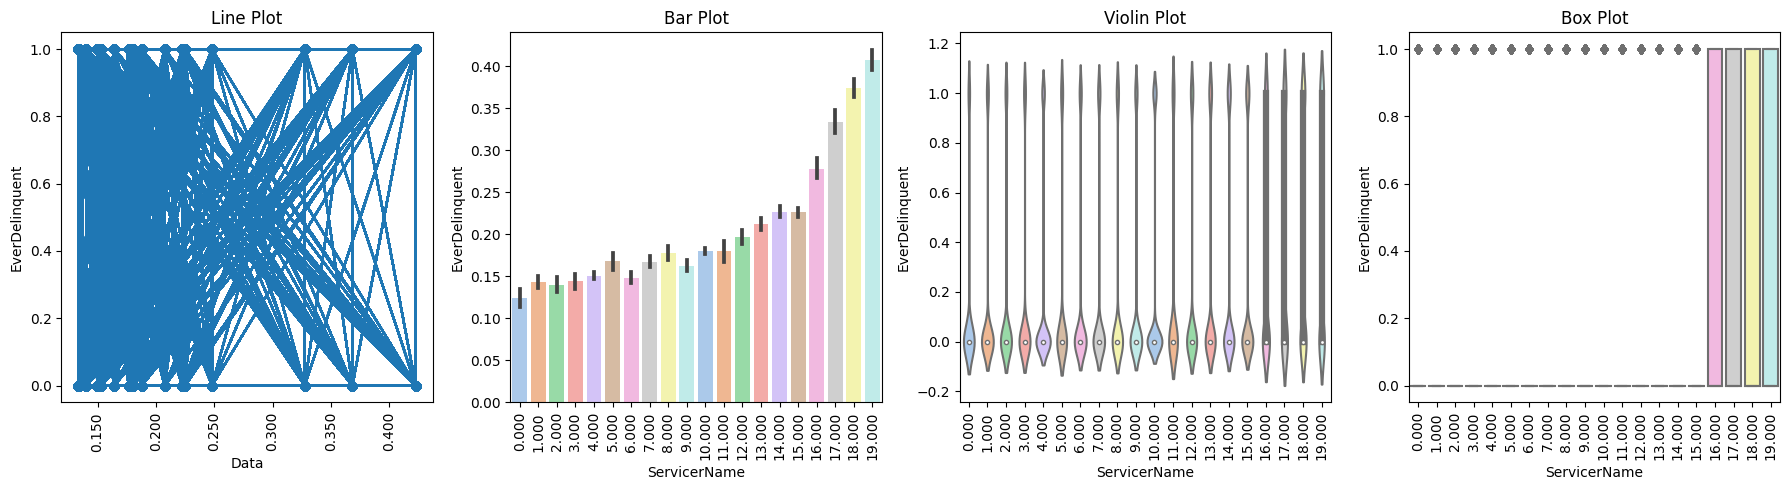

In [ ]:
continuous_vars = ['PropertyType', 'ServicerName']
def bivariate_analysis_continuous_data(data, category, target_variable):
    # Create a 1x4 subplot
    fig, axs = plt.subplots(1, 4, figsize=(18, 5))

    # Line plot
    axs[0].plot(data[category], data[target_variable], marker='o')
    axs[0].set_xlabel('Data')
    axs[0].set_ylabel(target_variable)
    axs[0].set_title('Line Plot')
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].xaxis.set_major_formatter('{:.3f}'.format)

    # Bar plot
    sns.barplot(x=category, y=target_variable, data=data, ax=axs[1], palette='pastel')
    axs[1].set_xlabel(category)
    axs[1].set_ylabel(target_variable)
    axs[1].set_title('Bar Plot')
    axs[1].tick_params(axis='x', rotation=90)
    axs[1].xaxis.set_major_formatter('{:.3f}'.format)

    # Violin plot
    sns.violinplot(x=category, y=target_variable, data=data, ax=axs[2], palette='pastel')
    axs[2].set_xlabel(category)
    axs[2].set_ylabel(target_variable)
    axs[2].set_title('Violin Plot')
    axs[2].tick_params(axis='x', rotation=90)
    axs[2].xaxis.set_major_formatter('{:.3f}'.format)

    # Box plot
    sns.boxplot(x=category, y=target_variable, data=data, ax=axs[3], palette='pastel')
    axs[3].set_xlabel(category)
    axs[3].set_ylabel(target_variable)
    axs[3].set_title('Box Plot')
    axs[3].tick_params(axis='x', rotation=90)
    axs[3].xaxis.set_major_formatter('{:.3f}'.format)

    plt.tight_layout()
    plt.show()


# plot continuous variables according to the target variable
for col in continuous_vars:
  bivariate_analysis_continuous_data(data, col, target_variable)

> visualize different plots for descrite variables according to target variable.

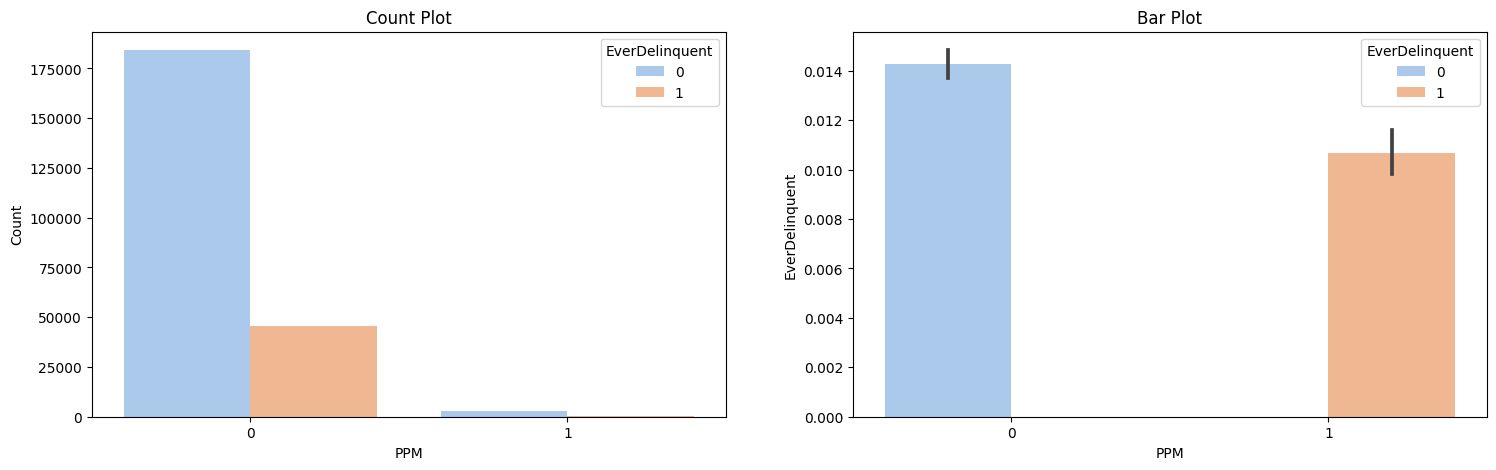

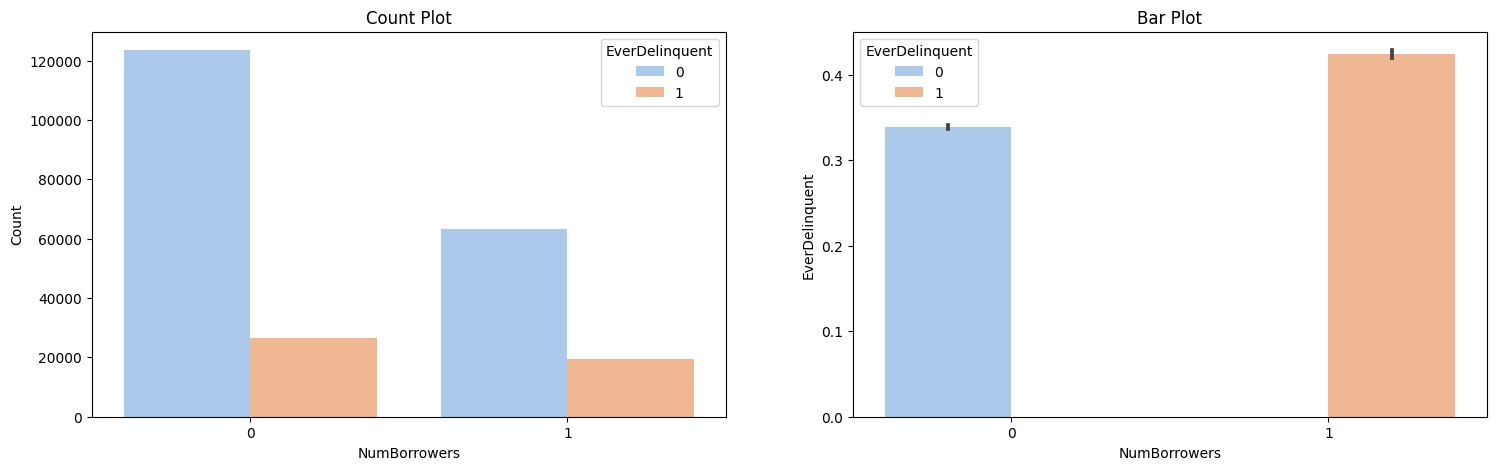

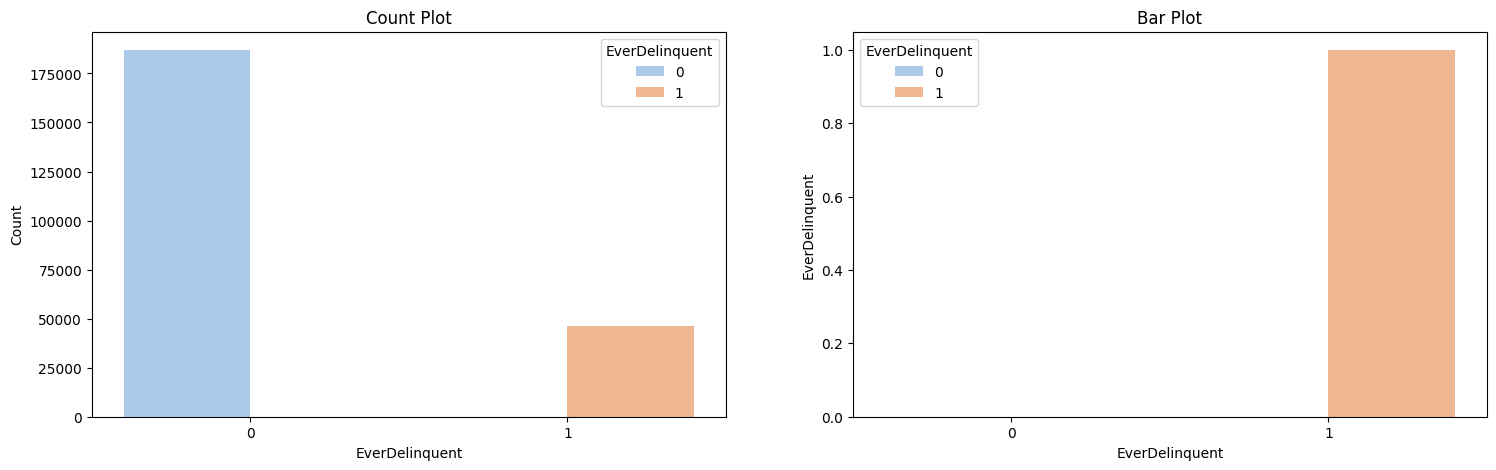

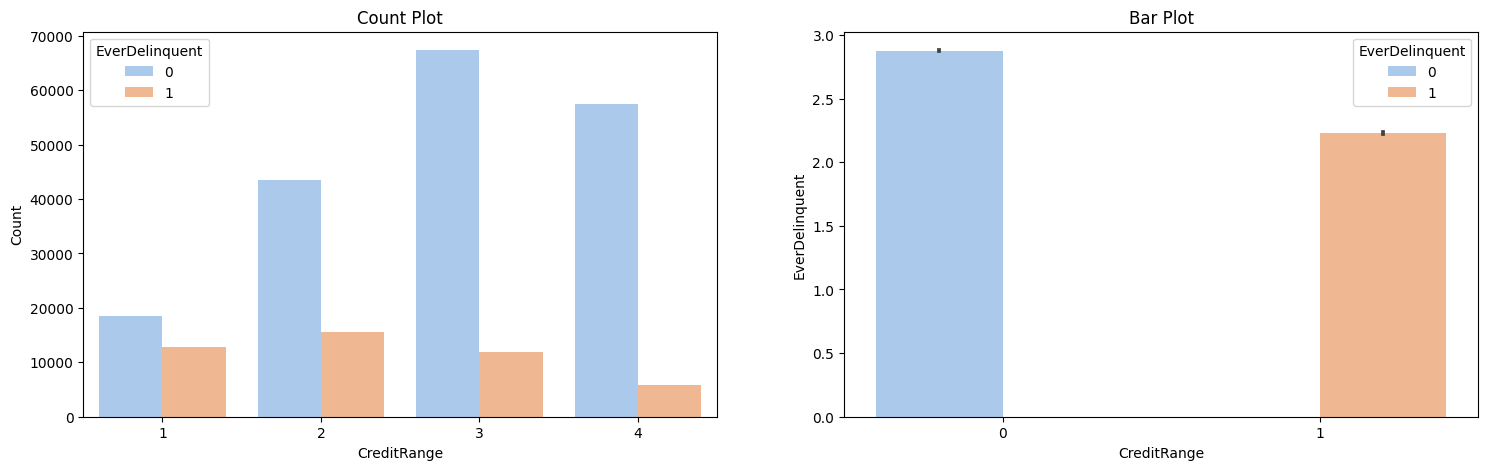

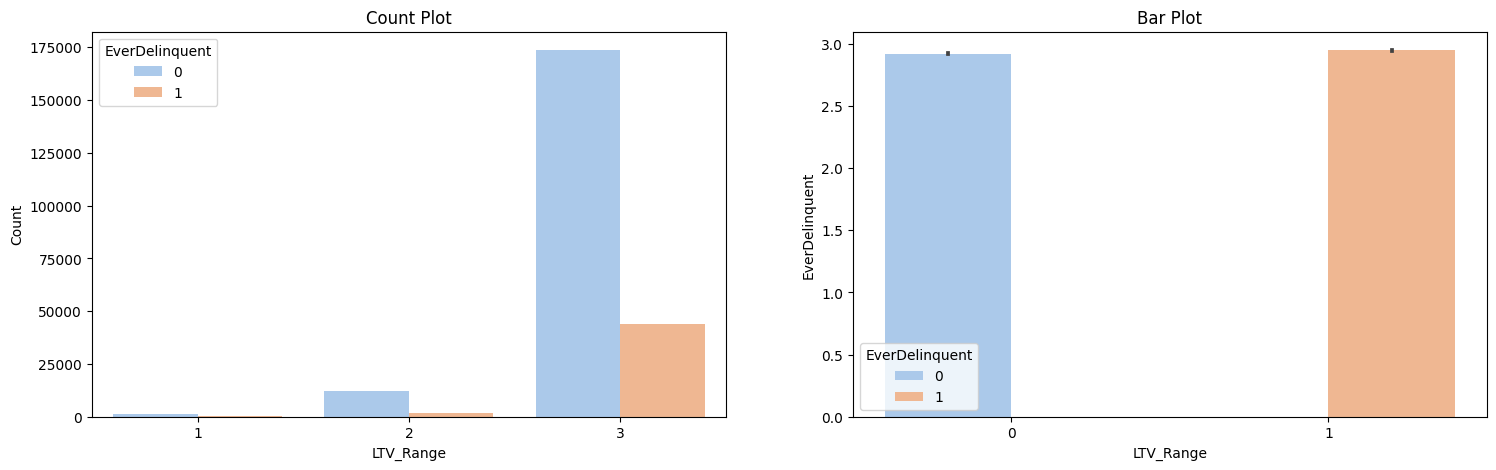

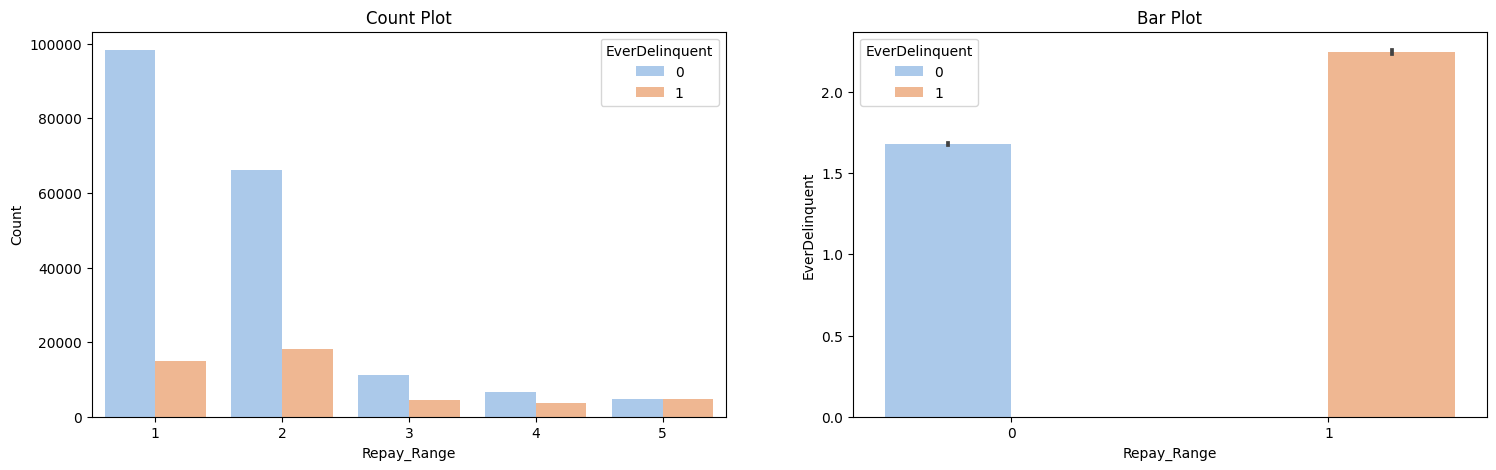

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def bivariate_analysis_categorical_data(data, col, target_variable):
    # Create a 1x5 subplot
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))

    # Count Plot
    sns.countplot(x=col, hue=target_variable, data=data, palette='pastel', ax=axs[0])
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Count')
    axs[0].set_title('Count Plot')

    # Bar Plot
    sns.barplot(x=target_variable, y=col, hue=target_variable, data=data, palette='pastel', ax=axs[1])
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target_variable)
    axs[1].set_title('Bar Plot')

# plot discrete variables according to the target variable
discrete_vars = ['PPM','NumBorrowers','EverDelinquent','CreditRange','LTV_Range','Repay_Range']

for col in discrete_vars:
    bivariate_analysis_categorical_data(data, col, 'EverDelinquent')


####Multivariate analysis

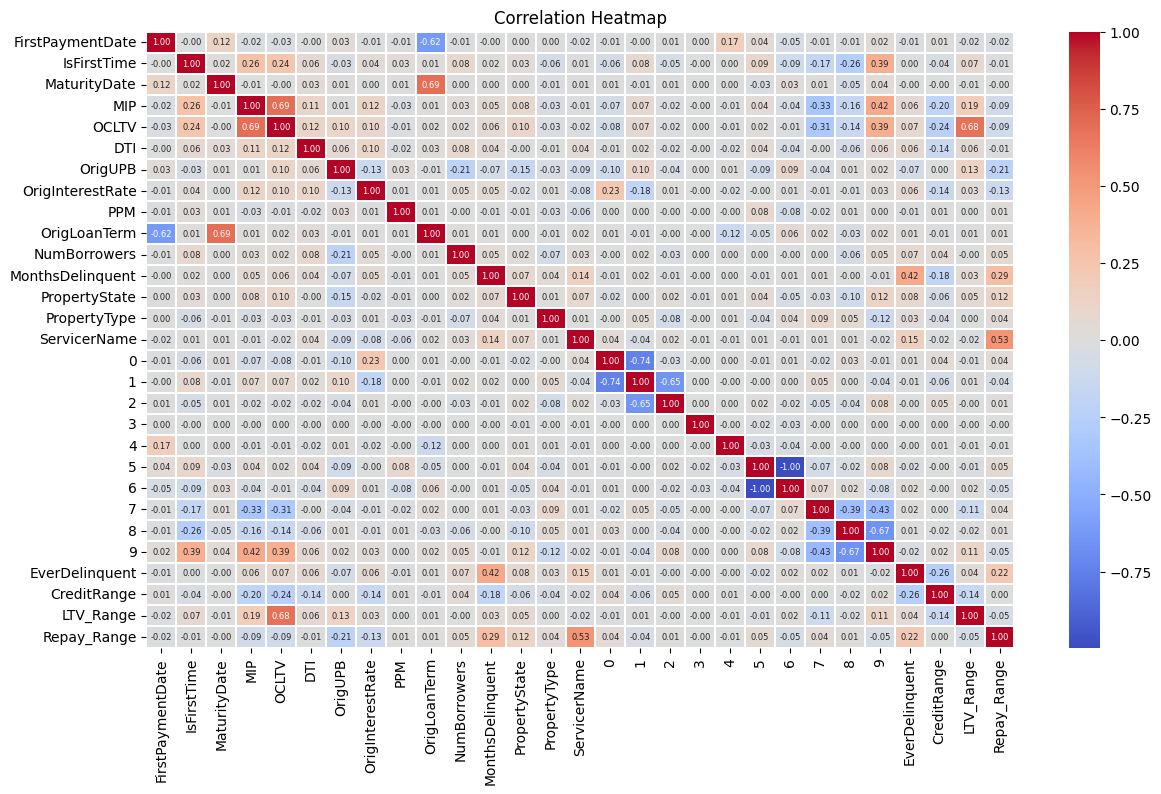

In [ ]:
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.2, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.set_style("whitegrid");
pair_plot_cols = ['MIP', 'OCLTV',
       'DTI', 'OrigUPB', 'OrigInterestRate', 'PPM', 'OrigLoanTerm',
       'NumBorrowers', 'MonthsDelinquent', 'EverDelinquent']
sns.pairplot(data[pair_plot_cols], hue="EverDelinquent", size=3);
plt.show()

#Feature Engineering

##Let's see if there can create some new interesting features

In [33]:
X = data.copy()
X["Loan_Duration"] = X["MaturityDate"] - X["FirstPaymentDate"]
X["Total_Interest_Paid"] = X["OrigUPB"] * X["OrigInterestRate"] * X["OrigLoanTerm"]
X["hasMIP"] = X["MIP"] > 0

##Mutual Information

>**MI (Mutual Information)** : it will help us to detect any linear or non-linear association between each variable and the target variable.


> there is 2 types of MI metrics (espacialy in Scikit-learn) : *mutual_info_regression*, *mutual_info_classif*

> Our target variable is a categorical variable. therefore, we will use **mutual_info_classif**

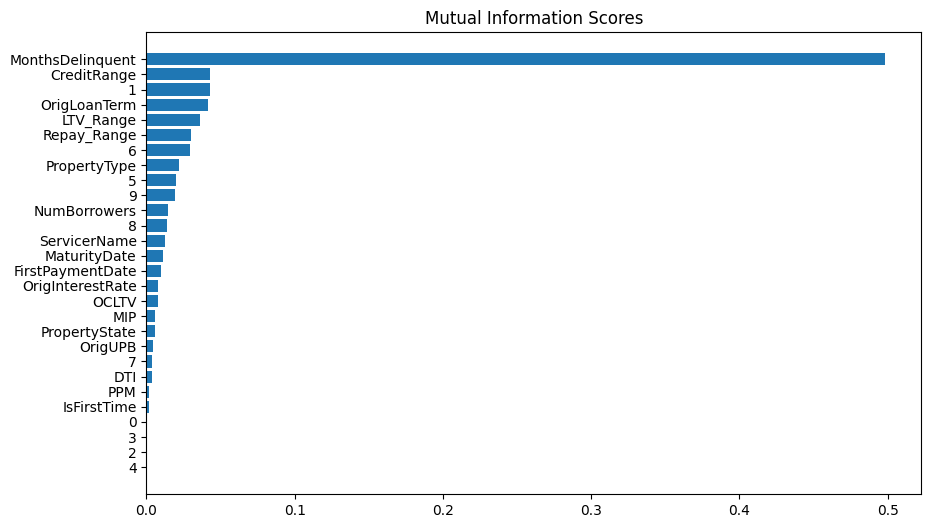

In [34]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

def make_mi_score_and_plot(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # ploting the scores for each feature

    plt.figure(dpi=100, figsize=(10, 6))
    mi_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(mi_scores))
    ticks = list(mi_scores.index)
    plt.barh(width, mi_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    return mi_scores


X = data.copy()
y = X.pop("EverDelinquent")

mi_scores = make_mi_score_and_plot(X, y)

> Let's now investigate some particular features

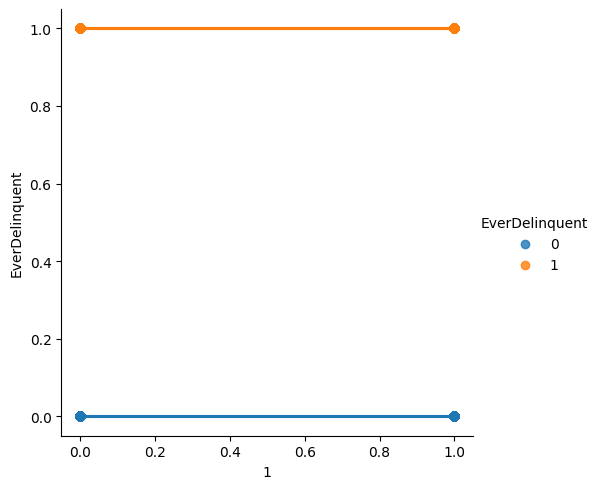

In [35]:
# sns.relplot(x="MonthsDelinquent", y="EverDelinquent", data=data)
sns.lmplot(x="1", y="EverDelinquent", hue="EverDelinquent", data=data)

> let's get 75% of important feautes

In [36]:
selector = SelectPercentile(mutual_info_classif, percentile=75)
X_reduced = selector.fit_transform(X, y)
X_reduced_columns = X.iloc[:,selector.get_support(indices=True)].columns.tolist()

print(f"X_reduced shape : {X_reduced.shape}")
print(f"X_reduced type : {type(X_reduced)}")
print(f"X_reduced_columns : {X_reduced_columns}")

X_reduced shape : (233127, 21)
X_reduced type : <class 'numpy.ndarray'>
X_reduced_columns : ['FirstPaymentDate', 'MaturityDate', 'MIP', 'OCLTV', 'DTI', 'OrigInterestRate', 'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent', 'PropertyState', 'PropertyType', 'ServicerName', '1', '5', '6', '7', '8', '9', 'CreditRange', 'LTV_Range', 'Repay_Range']


##Principal Component Analysis

>  is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining important patterns.

> we will work just with continues numerical features so we should normalize first.

In [37]:
# continous_features = data.select_dtypes(include=['float64', 'float32']).columns

# X = data.copy()
# y = X.pop('EverDelinquent')
# X = X.loc[:, continous_features]

# # Standardize or Normalization
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [38]:
X = data.copy()
y = X.pop('EverDelinquent')

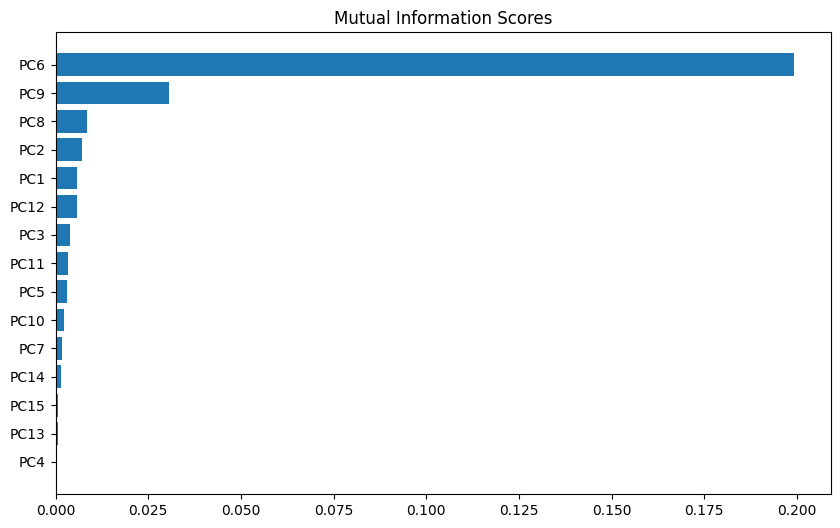

In [39]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

# Convert to dataframe
pca_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=pca_names)

X_pca_mi_score = make_mi_score_and_plot(X_pca, y)

In [40]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=pca_names,
    index=X.columns,
)
# loadings

#Applying Logistic Regression and Naive bays

#####logistic regression

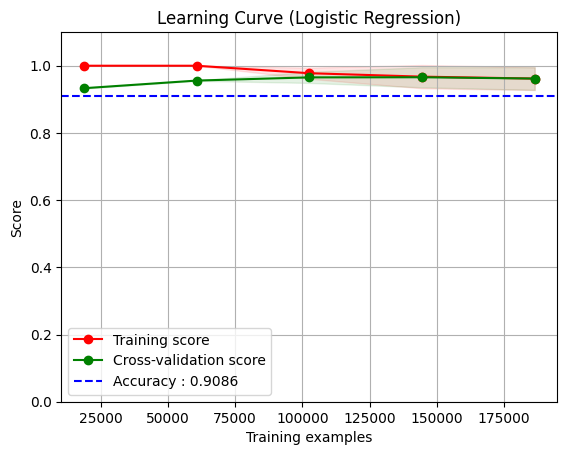

In [64]:
cv = KFold(n_splits=5, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# instantiate
model = LogisticRegression(max_iter=1000)

# fit
model.fit(X_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_pca, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5),
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

# box-like grid
plt.grid()

# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Accuracy line
plt.axhline(y=model.score(X_test, y_test), color="b", linestyle="--", label=f"Accuracy : {model.score(X_test, y_test):.4f}")

# set the y-axis limits for readability
plt.ylim(0, 1.1)

# add a legend
plt.legend(loc="best")

# display the plot
plt.show()

#####Naive Bayes

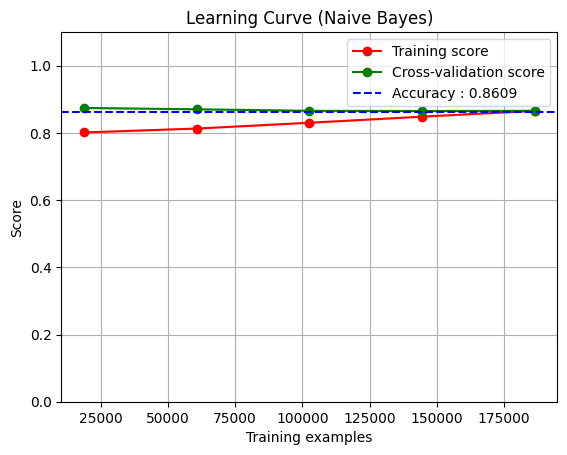

In [65]:
cv = KFold(n_splits=5, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# instantiate
model = GaussianNB()

# fit
model.fit(X_test, y_test)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_pca, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5),
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Naive Bayes)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

# box-like grid
plt.grid()

# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# Accuracy line
plt.axhline(y=model.score(X_test, y_test), color="b", linestyle="--", label=f"Accuracy : {model.score(X_test, y_test):.4f}")

# set the y-axis limits for readability
plt.ylim(0, 1.1)

# add a legend
plt.legend(loc="best")

# display the plot
plt.show()


### Applying other algorithms

In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# model
model = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]


# fit
tr_model = [(m_name , m.fit(X_train, y_train)) for (m_name, m) in model]


# accuracies
for (tm_name, tm) in tr_model:
    print(f"Accuracy['{tm_name}']: {tm.score(X_test, y_test)}")

Accuracy['Decision Tree']: 0.9935872689057608
Accuracy['SVM']: 0.8021275683095269
Accuracy['KNN']: 0.8708016986230859
Accuracy['Random Forest']: 0.9890190022734097
Accuracy['Gradient Boosting']: 0.9756788058164972
